In [28]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/d51iMGfp_t0QpO30Lym-dw/automobile-sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Optional: Show the first few rows of the dataframe
df.head()

Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


In [30]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,2001.520833,0.224432,101.210890,0.737756,41469.506155,2879.743655,6.118845,40.205748,-0.237074,2.441525,3164.160511
std,12.535031,0.417306,10.634092,0.286092,21388.409141,1175.338324,1.964292,16.291271,0.859691,1.108472,3640.137399
min,1980.000000,0.000000,73.900000,0.250000,15001.000000,494.200000,3.000000,12.510000,-4.230000,1.000000,40.000000
25%,1991.000000,0.000000,94.060000,0.500000,22039.000000,1872.000000,4.000000,27.210000,-0.570000,1.600000,923.000000
50%,2002.000000,0.000000,100.800000,0.810000,34957.500000,2883.500000,6.000000,39.420000,-0.005000,2.300000,2381.500000
75%,2012.000000,0.000000,108.320000,0.940000,57418.250000,3902.425000,8.000000,53.862500,0.392500,2.900000,4363.500000
max,2023.000000,1.000000,131.670000,1.500000,79998.000000,4983.000000,9.000000,70.370000,0.820000,6.000000,65645.000000


In [31]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Creating Visualizations for Data Analysis
TASK 1.1: Develop a Line chart using the functionality 
of pandas to show how Average automobile sales fluctuate from year to year

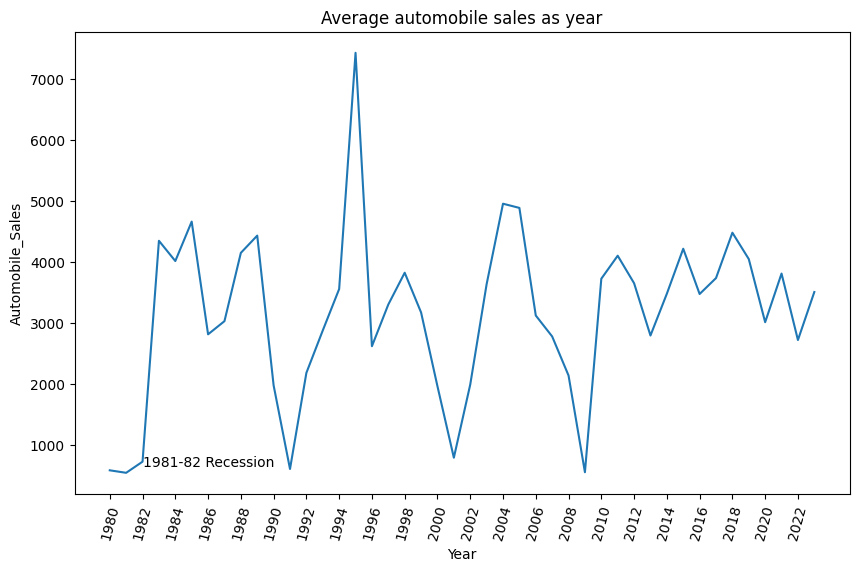

In [32]:
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    x=[x for x in range(1980,2024,2)]
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('Year')
    plt.text(1982, 650, '1981-82 Recession')
    plt.xticks(list(range(1980,2024)), rotation = 75)
    plt.ylabel('Automobile_Sales')
    plt.xticks(x)
    plt.title('Average automobile sales as year')
    plt.show()

<p1>
TASK 1.2: How do trends in advertising expenditure correlate with automobile sales during non-recession periods, and what insights can be derived from this relationship.</p1>

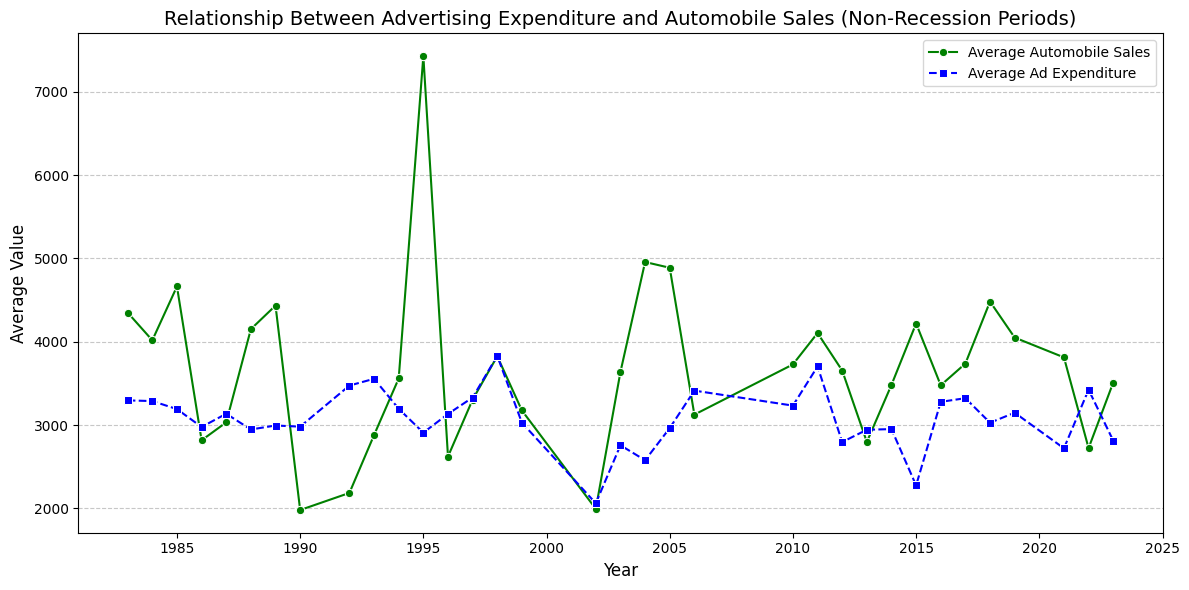

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for non-recession periods
df_non_rec = df[df['Recession'] == 0]

# Group by year and calculate means
df_trends = df_non_rec.groupby('Year', as_index=False).agg(
    Avg_Sales=('Automobile_Sales', 'mean'),
    Avg_Ad_Spend=('Advertising_Expenditure', 'mean')
)

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot Average Sales
sns.lineplot(data=df_trends, x='Year', y='Avg_Sales', 
             marker='o', linestyle='-', color='green', label='Average Automobile Sales')

# Plot Average Advertising Expenditure
sns.lineplot(data=df_trends, x='Year', y='Avg_Ad_Spend', 
             marker='s', linestyle='--', color='blue', label='Average Ad Expenditure')

# Customize the chart for clarity
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Relationship Between Advertising Expenditure and Automobile Sales (Non-Recession Periods)', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<p1>Inference: The graph shows that during non-recession periods, automobile sales are more volatile than advertising expenditure. While there are moments of alignment, sales often spike independently, suggesting other factors like market demand or economic conditions also play a significant role. The correlation between advertising and sales appears inconsistent over time.<p1>


TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

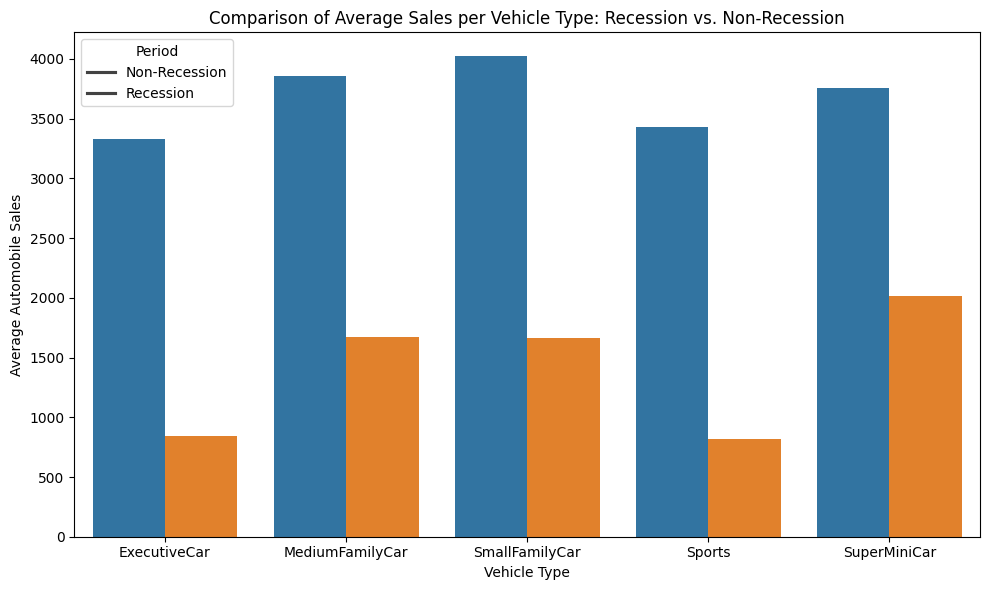

In [39]:
# Grouping the data by Recession and Vehicle_Type to get the average sales
df_vehicle = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Create the visualization
plt.figure(figsize=(10, 6))

# Using hue='Recession' to create the comparison side-by-side
sns.barplot(data=df_vehicle, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')

# Customizing labels and title
plt.xticks(ticks=range(len(df_vehicle['Vehicle_Type'].unique())), 
           labels=df_vehicle['Vehicle_Type'].unique())
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Comparison of Average Sales per Vehicle Type: Recession vs. Non-Recession')

# Updating legend to be more descriptive
plt.legend(title='Period', labels=['Non-Recession', 'Recession'])

plt.tight_layout()
plt.show()

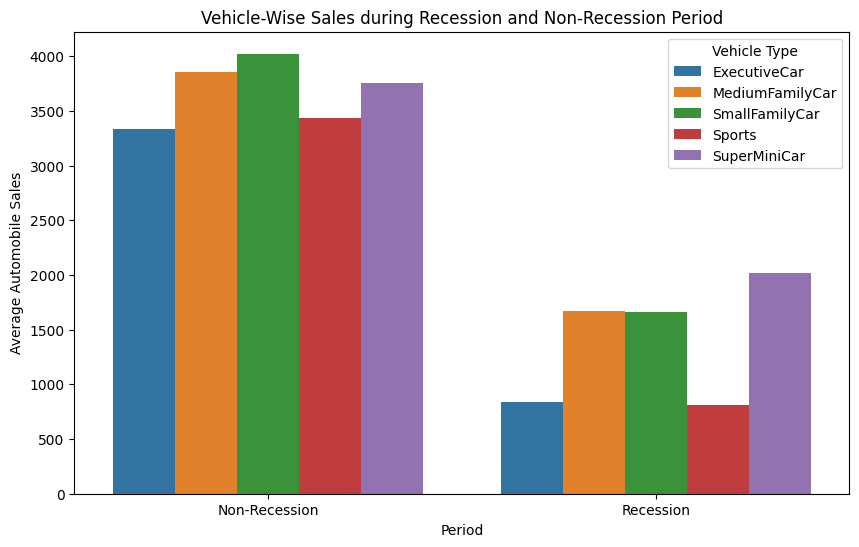

In [40]:
# Grouping by both Recession and Vehicle_Type to get the mean sales for each category
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))

# Set x as Recession and hue as Vehicle_Type to compare segments side-by-side
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)

# Customizing the x-axis to show labels instead of 0 and 1
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

# Adding descriptive labels and title
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.legend(title='Vehicle Type')
plt.show()

<p1>From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports</p1>


TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

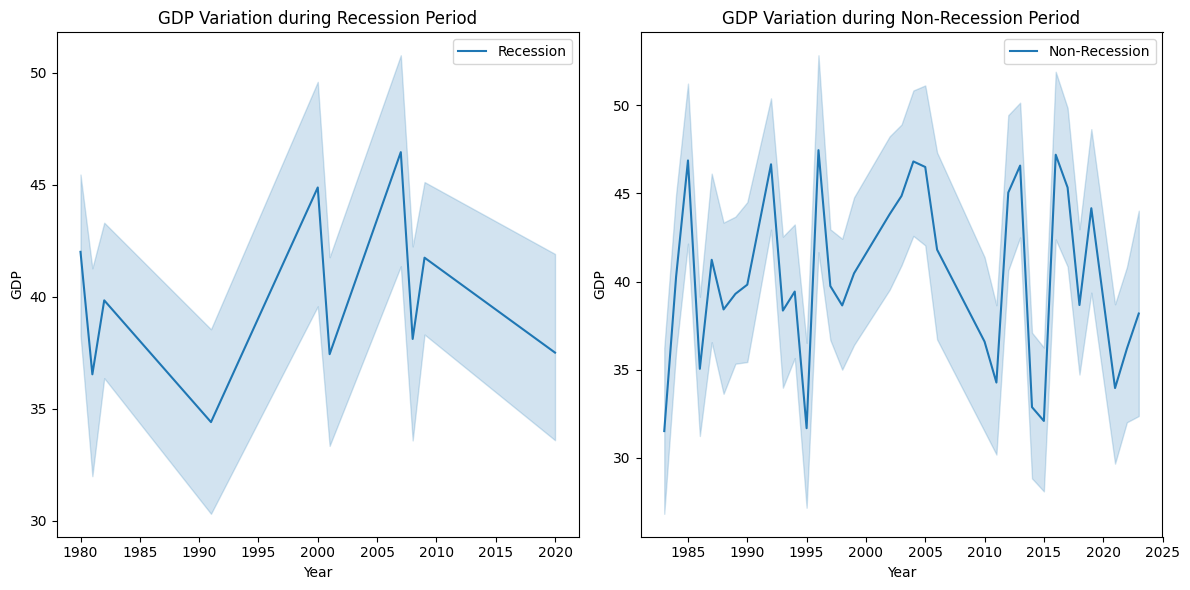

In [41]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # 1 row, 2 columns, first plot
ax1 = fig.add_subplot(1, 2, 2) # 1 row, 2 columns, second plot

# Subplot 1: Recession Period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Subplot 2: Non-Recession Period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

<p1>From this plot, it is evident that GDP tends to be lower and more volatile during recessions, with significant fluctuations and uncertainty. In contrast, non-recessionary periods show a relatively higher GDP level but still exhibit some degree of variability.</p1>


TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

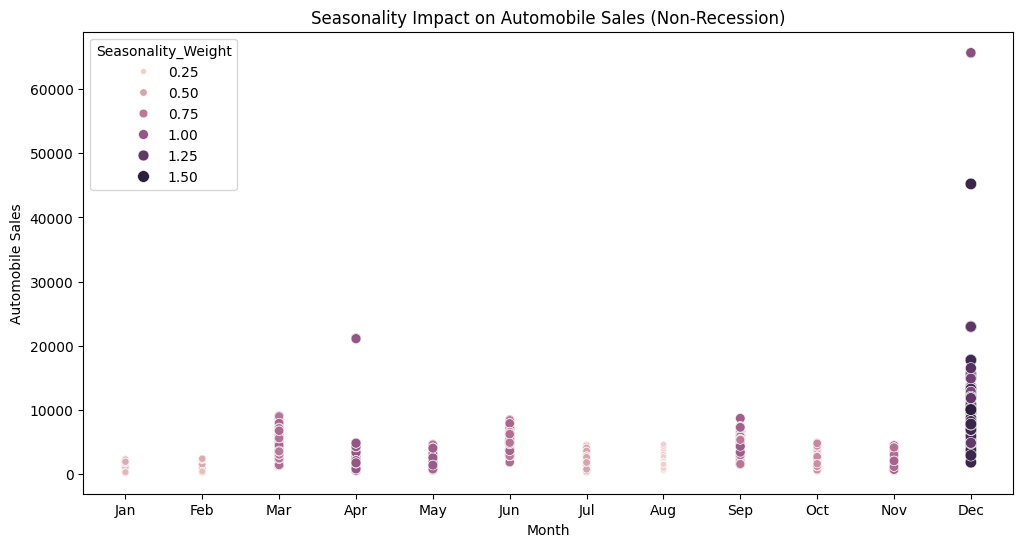

In [42]:
# Filter for non-recession data
non_rec_data = df[df['Recession'] == 0]

# Define the bubble size based on Seasonality_Weight
size = non_rec_data['Seasonality_Weight']

# Create the scatter plot (bubble chart)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_rec_data, 
                x='Month', 
                y='Automobile_Sales', 
                size=size, 
                hue='Seasonality_Weight', 
                legend=True) # Set legend to True to see the weight scale

# Customizing labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales (Non-Recession)')

# Ensure months are in a logical order if they aren't already
# plt.xticks(rotation=45) 

plt.show()

<p1>
Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April and December</p1>

TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the relationship between consumer confidence and automobile sales during recessions.

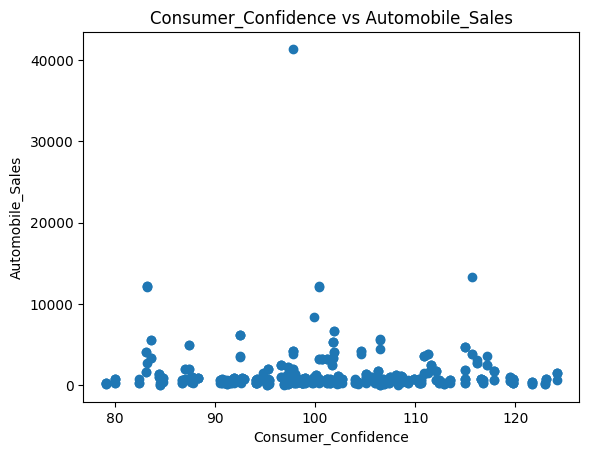

In [45]:
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('Consumer_Confidence')
    plt.ylabel('Automobile_Sales')
    plt.title('Consumer_Confidence vs Automobile_Sales')
    plt.show()

How does consumer confidence relate to automobile sales during recessions?

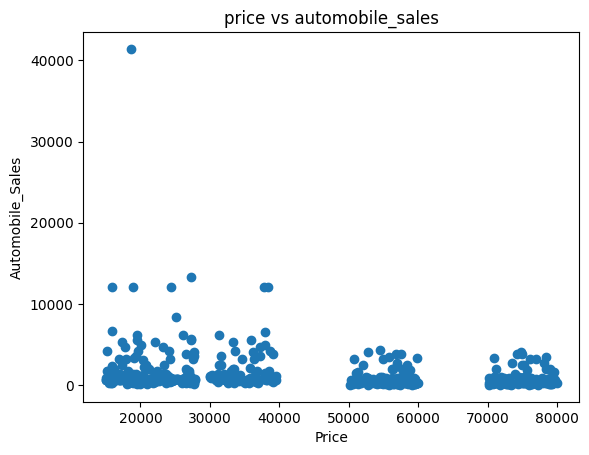

In [48]:
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
    plt.xlabel('Price')
    plt.ylabel('Automobile_Sales')
    plt.title('price vs automobile_sales')
    plt.show()

<p1>The graphs indicate that during recessions, higher consumer confidence tends to boost automobile sales, while higher vehicle prices generally correspond to lower sales. This highlights the strong influence of both consumer sentiment and affordability on purchasing decisions during economic downturns.


TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.¶

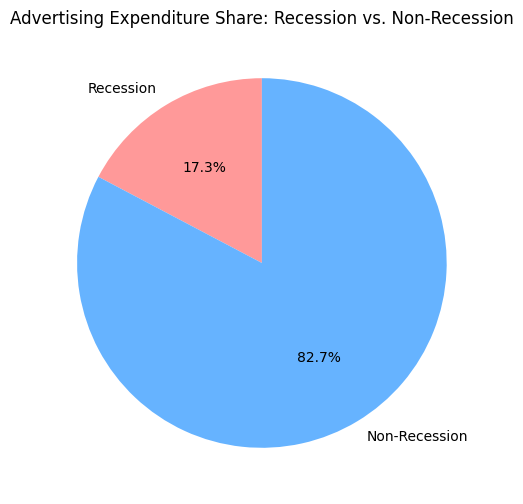

In [49]:
# Filter the data for recession and non-recession
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

# autopct='%1.1f%%' formats the labels to show the percentage
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

plt.title('Advertising Expenditure Share: Recession vs. Non-Recession')

plt.show()

<p1>It seems XYZAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

ASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

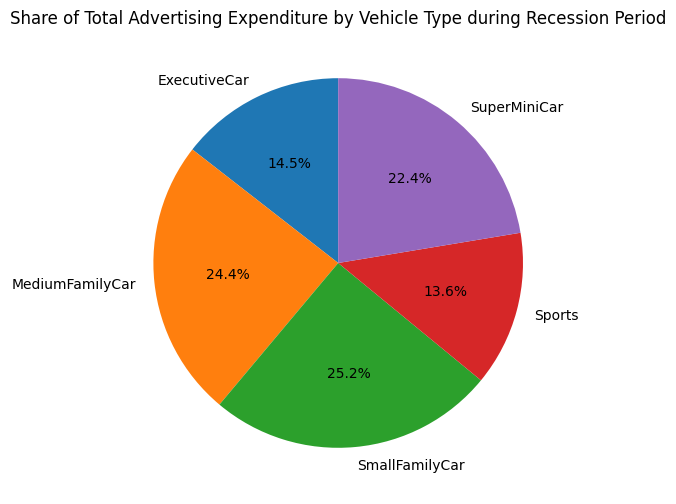

In [53]:
# Filter the data to include only recession periods
Rdata = df[df['Recession'] == 1]

# Calculate the advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a descriptive title
plt.title('Share of Total Advertising Expenditure by Vehicle Type during Recession Period')

plt.show()

<p1>During recession the advertisements were mostly focued on low price range vehicle. A wise decision

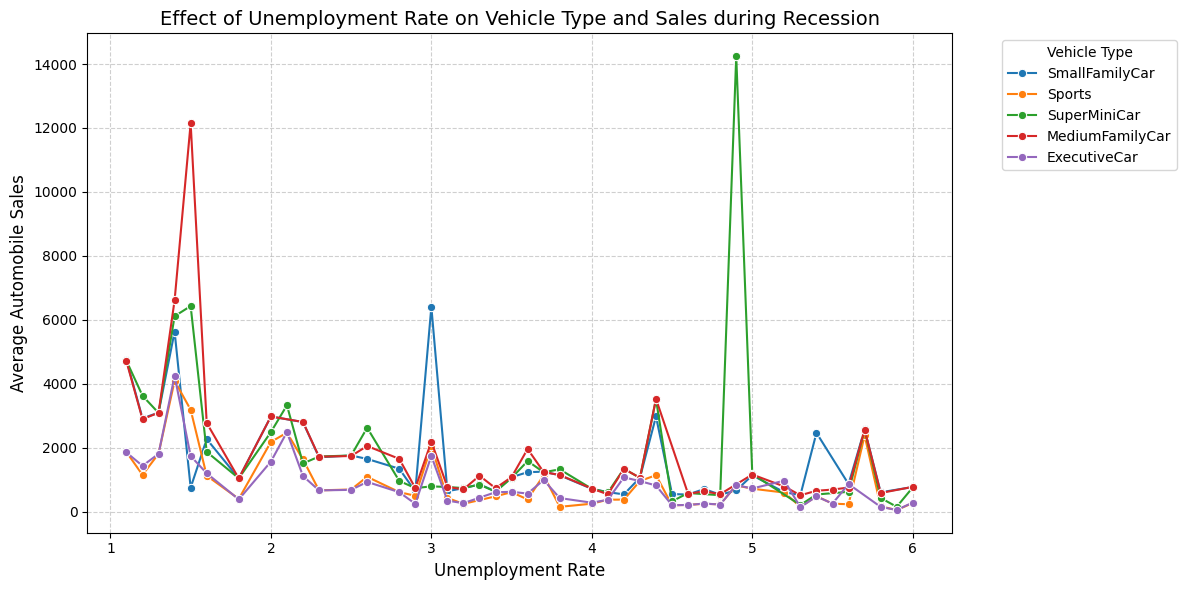

In [54]:
# Filter the data for Recession Period
df_rec = df[df['Recession'] == 1]

# Set figure size
plt.figure(figsize=(12, 6))

# Create line plot showing effect of unemployment rate on automobile sales, by vehicle type
sns.lineplot(
    data=df_rec,
    x='unemployment_rate',   # The independent economic variable
    y='Automobile_Sales',    # The dependent sales variable
    hue='Vehicle_Type',      # Differentiates the lines by vehicle category
    marker='o',
    err_style=None           # Optional: removes the confidence interval shading for a cleaner look
)

# Customize labels, legend, and title
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<p1>The plot shows that automobile sales decline as unemployment rates rise during a recession, with sharp drops beyond 3%. SuperMiniCars, SmallFamilyCars, and MediumFamilyCars exhibit high volatility, reflecting their sensitivity to economic uncertainty and changing consumer priorities